In [1]:
import numpy as np

In [2]:
from scipy.io import loadmat
from scipy.linalg import expm, logm

In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_path = '/Users/linggeli/neuroscience/data/SuperChris/super_chris_extraction_odor2s.mat'
data_odor = loadmat(data_path)

In [5]:
trial_info = data_odor['trialInfo']

In [63]:
# in-sequence correct trials
select_odor_B = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1) & (trial_info[:, 3] == 1)
select_odor_C = (trial_info[:, 0] == 1) & (trial_info[:, 1] == 1) & (trial_info[:, 3] == 3)

In [64]:
# from odor release to 1s after
# LFP channels from 5 to 10
lfp_odor_B = data_odor['lfpEpoch'][select_odor_B, 2000:3000, 5:10]
lfp_odor_C = data_odor['lfpEpoch'][select_odor_C, 2000:3000, 5:10]

In [65]:
print(lfp_odor_B.shape)
print(lfp_odor_C.shape)

(53, 1000, 5)
(30, 1000, 5)


In [66]:
def sliding_window(time_series, size=50, stride=1):
    """
    Calculate sliding window covariance Log-Euclidean vector time series.

    Args
        time_series: (numpy array) [t, n] t observations in time of n dimensional data
        size: (int) sliding window size
        stride: (int) sliding step size
    """
    t, n = time_series.shape
    log_series = np.zeros((int((t - size) / stride), int(0.5 * n * (n + 1))))
    for i in range(int((t - size) / stride)):
        window = time_series[(i * stride):(i * stride + size), :]
        cov = np.cov(window, rowvar=False)
        log_series[i, :] = logm(cov)[np.triu_indices(n)]
    return log_series

In [72]:
odor_B_list = []
for i in range(20):
    cov_ts = sliding_window(lfp_odor_B[i, :, :], size=50, stride=10)
    odor_B_list.append(cov_ts)

In [74]:
# 95 time points and 15 elements
print(odor_B_list[0].shape)

(95, 15)


In [75]:
odor_C_list = []
for i in range(20):
    cov_ts = sliding_window(lfp_odor_C[i, :, :], size=50, stride=10)
    odor_B_list.append(cov_ts)

In [76]:
all_vector = np.concatenate(odor_B_list + odor_C_list)
Y = all_vector - np.mean(all_vector, axis=0)
print(Y.shape)

(3800, 15)


In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=10)
components = pca.fit_transform(Y)

In [79]:
print(pca.explained_variance_ratio_)

[0.21383878 0.13596479 0.09935072 0.07964754 0.07139094 0.06432487
 0.06333896 0.05565469 0.04715764 0.04030608]


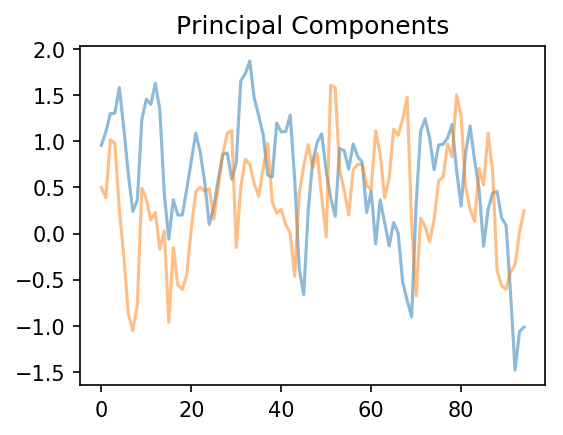

In [81]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(components[:95, j], alpha=0.5)
plt.title('Principal Components')
plt.show()